### Data Cleaning

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Excel file path
file_path = 'WorldEnergyData/Statistical Review of World Energy Data.xlsx'

# Specify the sheet name
sheet_name = 'Primary Energy Consumption'

# Read the data into a DataFrame using pd.read_excel()
df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

# Remove rows 1, 2, 4
df = df.drop([0, 1, 3])

# Remove last three columns
df = df.iloc[:, :-3]

# Use the row with years as column names
df.columns = df.iloc[0]

# Delete the last 6 rows
df = df.iloc[:-15]

# Reset the index
df = df.reset_index(drop=True)

# Remove the rows where it has years
df = df.drop([0])

# Delete rows with all NaN values
df = df.dropna(axis=0, how='all')

# Delete rows where the country name has 'Total' in it
df = df[~df.iloc[:, 0].str.contains('Total')]

# Delete rows where the country name has 'Other' in it
df = df[~df.iloc[:, 0].str.contains('Other')]

# Rename column to 'Country'
df.rename(columns={df.columns[0]: 'Country'}, inplace=True)

# Convert the years (column names) to integers starting from the second column
df.columns = [df.columns[0]] + [int(col) for col in df.columns[1:]]

# Convert data to numeric, ignoring errors
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# If the first column is named 'Country'
df = df.sort_values(by='Country')

# Reset index
df = df.reset_index(drop=True)

# Set option to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()


,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Algeria,0.089398,0.107397,0.101691,0.109242,0.120741,0.132332,0.143038,0.160732,0.191702,0.212072,0.253331,0.295568,0.324765,0.408101,0.534745,0.637715,0.774670,0.893204,0.975480,0.936706,0.944268,0.998966,1.026605,1.099519,1.069446,1.133905,1.123542,1.152817,1.072782,1.086916,1.127321,1.115729,1.072295,1.110056,1.121163,1.079804,1.118927,1.159022,1.212920,1.259200,1.318578,1.365192,1.438703,1.524805,1.615894,1.580382,1.672158,1.827619,1.933117,2.108208,2.223065,2.221185,2.245661,2.410631,2.499656,2.336036,2.531047,2.465531
1,Argentina,1.182699,1.221029,1.256516,1.299040,1.342478,1.272551,1.349070,1.366013,1.427248,1.484200,1.449256,1.521770,1.589250,1.591657,1.708761,1.699269,1.648669,1.679446,1.748749,1.754439,1.733828,1.831985,1.914614,1.946656,1.877187,1.846878,1.876850,2.013514,2.080233,2.191540,2.261651,2.365662,2.393119,2.478330,2.505838,2.515597,2.457087,2.356105,2.525420,2.681342,2.845827,2.989954,3.116324,3.157841,3.069039,3.182289,3.272728,3.397343,3.533033,3.527488,3.588984,3.572727,3.569030,3.543644,3.338490,3.131384,3.476418,3.603504
2,Australia,1.532736,1.605966,1.703135,1.806098,1.880742,2.052366,2.155707,2.253942,2.409681,2.562844,2.606041,2.696717,2.829487,2.920395,3.028649,3.039289,3.088058,3.059710,2.955381,3.068712,3.159252,3.221658,3.316255,3.468422,3.643502,3.719014,3.691101,3.751878,3.830682,3.979678,4.155476,4.277293,4.382237,4.486790,4.670450,4.698934,4.735387,4.830282,4.899104,5.055999,5.077261,5.295016,5.422201,5.514284,5.434360,5.431819,5.610968,5.530007,5.600110,5.639249,5.765588,5.784359,5.767092,5.851674,6.048920,5.713495,5.733323,5.980278
3,Austria,0.682194,0.713970,0.721309,0.771270,0.798935,0.914937,0.911103,0.942573,1.013436,1.018664,1.011829,1.047217,1.049752,1.095083,1.159982,1.155146,1.121472,1.084758,1.081783,1.070887,1.136900,1.139165,1.202468,1.184875,1.191504,1.206603,1.265448,1.245495,1.267650,1.259890,1.321311,1.323014,1.350965,1.372616,1.404175,1.409096,1.459322,1.461625,1.476913,1.504333,1.531651,1.515632,1.483171,1.512034,1.464642,1.512564,1.425848,1.492287,1.480332,1.421273,1.421440,1.468741,1.501935,1.469927,1.544500,1.443967,1.453120,1.373727
4,Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845822,0.910204,0.882082,0.882736,0.900187,0.937984,0.901265,0.771818,0.669529,0.615113,0.578333,0.474267,0.454157,0.455923,0.454872,0.475399,0.458019,0.452191,0.489727,0.554033,0.600615,0.590730,0.543856,0.548614,0.471085,0.464189,0.527749,0.544203,0.556748,0.566234,0.619217,0.613761,0.602335,0.617579,0.646387,0.659194,0.704456,0.699093


### Exploring the log graph

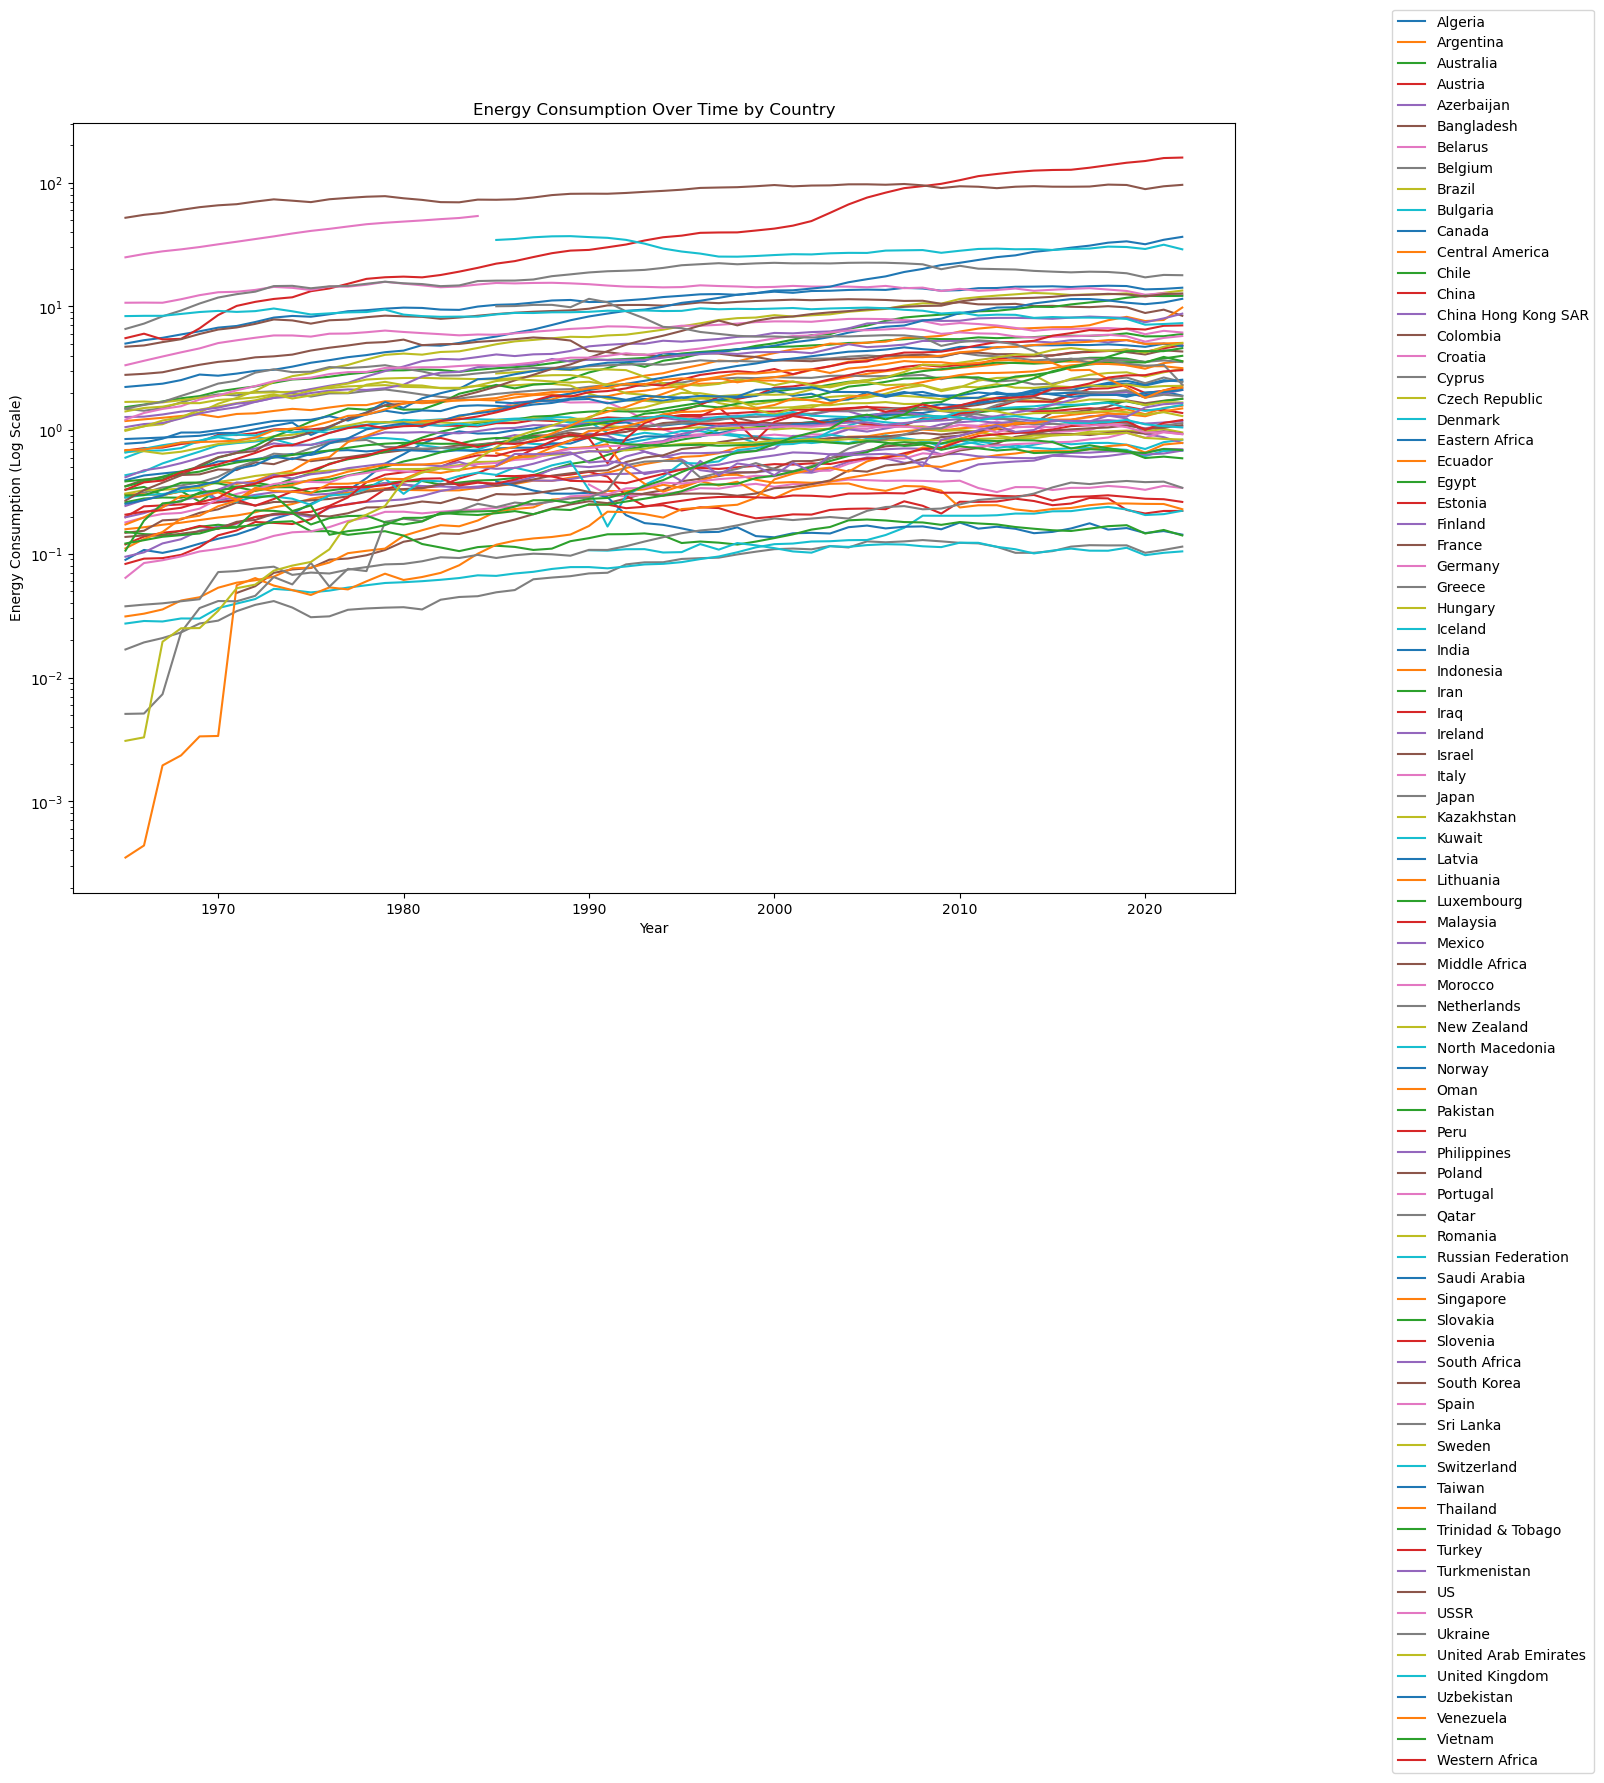

In [52]:
# Replace zero values with NaN so they won't plot on a log scale
df_1 = df.replace(0, np.nan)

# Reset the index
df_1 = df_1.reset_index()

# Set the 'Country' column as the index
df_1.set_index('Country', inplace=True)

# Transpose the DataFrame to have years as the index
df_1 = df_1.transpose()

# Make the plot bigger
plt.figure(figsize=(15, 10))

# Plotting each country's energy values over time without zero values
for country in df_1.columns:
    # Remove zero values by masking
    country_data = df_1[country]
    country_data_masked = country_data[country_data > 0]
    plt.plot(country_data_masked.index, country_data_masked, label=country)

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add title and labels
plt.title('Energy Consumption Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (Log Scale)')

# Create a separate figure for the legend
plt.figlegend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Show the plot
plt.show()


The graph is not clear with all the countries. Let us examine the mean of countries where the energy consumption is in the top %25

### Top %25 countries

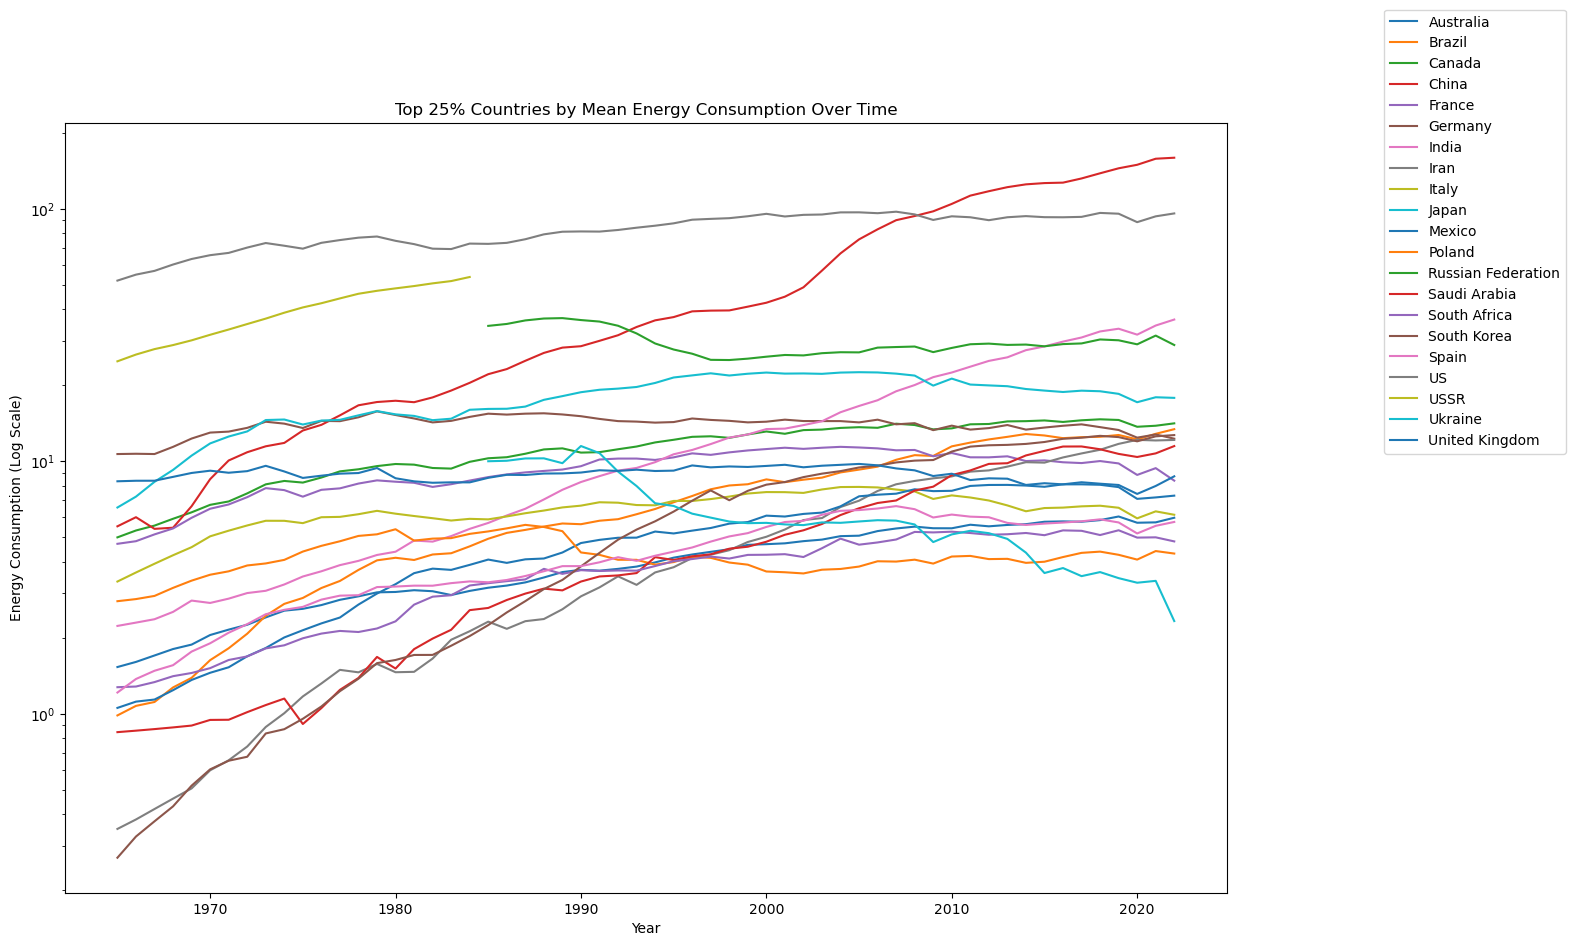

In [48]:
# Calculate the mean energy consumption for each country over all years
# Assuming non-numeric values have been handled already
mean_energy = df_1.mean(axis=0)

# Determine the value at the 75th percentile
top_25_threshold = np.percentile(mean_energy, 75)

# Select the columns (countries) that are in the top 25% of mean energy consumption
top_25_countries = mean_energy[mean_energy >= top_25_threshold].index.tolist()

# Plotting the top 25% countries
plt.figure(figsize=(15, 10))

for country in top_25_countries:
    # We replace any 0 with NaN to avoid issues with the log scale
    country_data = df_1[country].replace(0, np.nan)
    plt.plot(country_data.index, country_data, label=country)

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add title and labels
plt.title('Top 25% Countries by Mean Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (Log Scale)')

# Create a separate figure for the legend
plt.figlegend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Show the plot
plt.show()


From the year 2010 to 2020 we can see that the US has maintained a steady energy use but on the other hand, China has been on a steady increase.

### Top %10

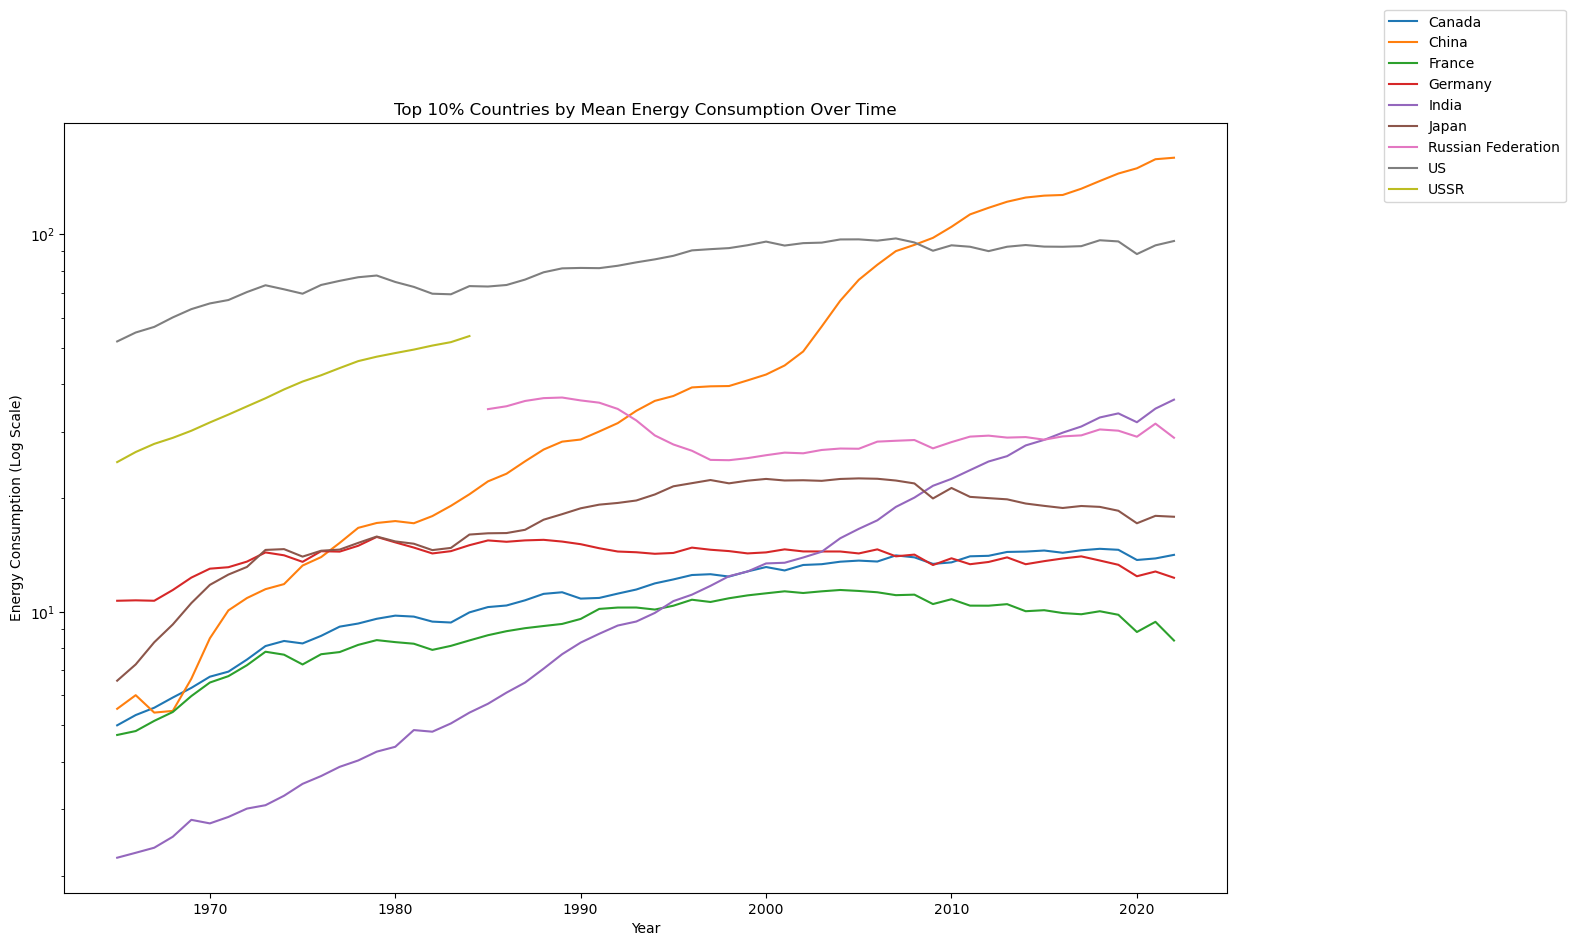

In [49]:
# Calculate the mean energy consumption for each country over all years
mean_energy = df_1.mean(axis=0)

# Determine the value at the 90th percentile for the top 10%
top_10_threshold = np.percentile(mean_energy, 90)

# Select the columns (countries) that are in the top 10% of mean energy consumption
top_10_countries = mean_energy[mean_energy >= top_10_threshold].index.tolist()

# Plotting the top 10% countries
plt.figure(figsize=(15, 10))

for country in top_10_countries:
    # We replace any 0 with NaN to avoid issues with the log scale
    country_data = df_1[country].replace(0, np.nan)
    plt.plot(country_data.index, country_data, label=country)

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add title and labels
plt.title('Top 10% Countries by Mean Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (Log Scale)')

# Create a separate figure for the legend
# Depending on the number of countries, you might want to omit the legend if it's too cluttered
# plt.figlegend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Create a separate figure for the legend
plt.figlegend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

# Show the plot
plt.show()

Taking the top 10%, it is very clear that China and India are on a continous increase the energy use

## World map visualization

### Unpivot data using melt and sort

In [54]:
# Assuming your DataFrame is named df
df_melted = df.melt(id_vars=['Country'], var_name='year', value_name='energy_consumption')

# Sort data by country
df_melted = df_melted.sort_values(by=['Country','year'])

# Reset the index
df_melted = df_melted.reset_index(drop=True)

# Set country name as index
# df_melted.set_index('country', inplace=True)

# Replace "North Macedonia" with "Macedonia, the former Yugoslav Republic of" in df_codes
df_melted['Country'] = df_melted['Country'].replace('North Macedonia', 'Macedonia, the former Yugoslav Republic of')

# Replace "China Hong Kong SAR" with "Hong Kong" in df_codes
df_melted['Country'] = df_melted['Country'].replace('China Hong Kong SAR', 'Hong Kong')

# Replace "US" with "United States" in df_codes
df_melted['Country'] = df_melted['Country'].replace('US', 'United States')

df_melted.head()

,Country,year,energy_consumption
0,Algeria,1965,0.089398
1,Algeria,1966,0.107397
2,Algeria,1967,0.101691
3,Algeria,1968,0.109242
4,Algeria,1969,0.120741


### Format for plotly Choropleth visualization

In [55]:
# Read country codes into a new df
df_codes = pd.read_csv('WorldEnergyData/countries_codes_and_coordinates.csv')

# Merge the DataFrame with the country codes
# We're using 'left' merge to keep all records from your original data
df_merged = pd.merge(df_melted, df_codes[['Country', 'Alpha-3 code']], on='Country', how='left')

# Delete rows where there are NaN values
df_merged = df_merged.dropna()

# rename Alpha-2 code column name
df_merged = df_merged.rename(columns={'Alpha-3 code': 'iso_alpha'})

# Ensure that iso_alpha values are correctly formatted by removing quotes
df_merged['iso_alpha'] = df_merged['iso_alpha'].str.replace('"', '')

# Convert energy from exajoules to gigajoules
#df_merged['energy_consumption'] = df_merged['energy_consumption'] * 1000000

# Convert 'year' to string for the animation
df_merged['year'] = df_merged['year'].astype('int64')

# Convert 'energy_consumption' to numeric values
df_merged['energy_consumption'] = pd.to_numeric(df_merged['energy_consumption'], errors='coerce')

# Remove leading and trailing spaces from the iso_alpha column
df_merged['iso_alpha'] = df_merged['iso_alpha'].str.strip()

df_merged.head()

,Country,year,energy_consumption,iso_alpha
0,Algeria,1965,0.089398,DZA
1,Algeria,1966,0.107397,DZA
2,Algeria,1967,0.101691,DZA
3,Algeria,1968,0.109242,DZA
4,Algeria,1969,0.120741,DZA


### Map Visualization

In [56]:
# Create basic choropleth map
fig = px.choropleth(df_merged, 
                    locations='iso_alpha', 
                    color='energy_consumption', 
                    hover_name='Country',
                    projection='natural earth', 
                    animation_frame='year',
                    title='Energy Consumption in Exajoules over time by Country')

# Show figure
fig.show()